# Netflix (NFLX) Stock Price prediction using Facebook Prophet

## Importing all the necessary Libraries

In [17]:
from google.colab import files
upload = files.upload()

Saving NFLX.csv to NFLX.csv


In [15]:
import pandas as pd
import plotly.express as px
from prophet import Prophet
import os

In [14]:
 #Initializing Plotly
 import plotly.io as pio
 pio.renderers.default='colab'

## Importing the Dataset & Exploring it

In [18]:
df = pd.read_csv("NFLX.csv")

In [19]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...,...
5319,2023-07-12,444.549988,445.410004,437.750000,444.049988,444.049988,5731700
5320,2023-07-13,447.000000,451.670013,441.179993,450.380005,450.380005,6157500
5321,2023-07-14,452.790009,456.480011,439.700012,441.910004,441.910004,7184900
5322,2023-07-17,445.570007,456.679993,445.109985,450.049988,450.049988,6891700


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5324 entries, 0 to 5323
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5324 non-null   object 
 1   Open       5324 non-null   float64
 2   High       5324 non-null   float64
 3   Low        5324 non-null   float64
 4   Close      5324 non-null   float64
 5   Adj Close  5324 non-null   float64
 6   Volume     5324 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 291.3+ KB


In [21]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5324.000000,5324.000000,5324.000000,5324.000000,5324.000000,5.324000e+03
mean,125.972455,127.953955,123.928764,126.002753,126.002753,1.613337e+07
std,169.932799,172.412911,167.304666,169.909676,169.909676,1.885313e+07
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05
25%,4.071429,4.143929,3.972500,4.072857,4.072857,6.078825e+06
50%,31.729285,32.195000,31.061429,31.677857,31.677857,1.026640e+07
75%,208.327499,212.619999,204.779995,209.930004,209.930004,1.910425e+07
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08


# Data Visualization using plotly express- Visualizing the historical performance of Netflix

In [22]:
px.area(df, x='Date', y='Close')

In [23]:
px.line(df, x='Date', y='Close')

In [24]:
px.area(df, x='Date', y='Volume')

In [25]:
px.bar(df, y='Volume')

In [26]:
px.box(df, y='Close')

# Understanding Facebook Prophet

- Accurate and Fast: It is accurate and can generate results a lot faster compared to other time series libraries
- Reliable: Extensive documentation available
- Fully automatic: Works with missing data and no need to perform extensive data preprocessing
- Domain Knowledge integration: Forecasting can be made better by adding domain knowledge expertise like holidays and patterns

## Data Preparation

In [28]:
prophet_df = df[['Date', 'Close']].rename(columns={'Date': 'ds', 'Close': 'y'})
prophet_df.head()

,ds,y
0,2002-05-23,1.196429
1,2002-05-24,1.210000
2,2002-05-28,1.157143
3,2002-05-29,1.103571
4,2002-05-30,1.071429


## Creating Facebook Prophet Model

In [29]:
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprq04c20a/9pwimrtl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprq04c20a/c9gkathx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23544', 'data', 'file=/tmp/tmprq04c20a/9pwimrtl.json', 'init=/tmp/tmprq04c20a/c9gkathx.json', 'output', 'file=/tmp/tmprq04c20a/prophet_model7788x0q3/prophet_model-20230719201932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
20:19:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
20:19:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


##Forecasting

In [30]:
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

In [31]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2002-05-23,0.252717,-76.112463,70.668441,0.252717,0.252717,-4.750606,-4.750606,-4.750606,-0.010938,-0.010938,-0.010938,-4.739668,-4.739668,-4.739668,0.0,0.0,0.0,-4.497890
1,2002-05-24,0.255277,-76.236905,69.937219,0.255277,0.255277,-5.364426,-5.364426,-5.364426,-0.932839,-0.932839,-0.932839,-4.431587,-4.431587,-4.431587,0.0,0.0,0.0,-5.109149
2,2002-05-28,0.265519,-67.439529,72.655572,0.265519,0.265519,-3.421917,-3.421917,-3.421917,-0.007336,-0.007336,-0.007336,-3.414581,-3.414581,-3.414581,0.0,0.0,0.0,-3.156397
3,2002-05-29,0.268080,-69.992328,66.857853,0.268080,0.268080,-3.340335,-3.340335,-3.340335,-0.122399,-0.122399,-0.122399,-3.217936,-3.217936,-3.217936,0.0,0.0,0.0,-3.072255
4,2002-05-30,0.270641,-70.108767,69.105312,0.270641,0.270641,-3.054263,-3.054263,-3.054263,-0.010938,-0.010938,-0.010938,-3.043325,-3.043325,-3.043325,0.0,0.0,0.0,-2.783622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5684,2024-07-13,384.663070,315.935520,467.049586,376.516954,392.940946,5.955302,5.955302,5.955302,0.473307,0.473307,0.473307,5.481995,5.481995,5.481995,0.0,0.0,0.0,390.618372
5685,2024-07-14,384.651358,318.068726,462.026445,376.479406,392.970121,5.731118,5.731118,5.731118,0.473307,0.473307,0.473307,5.257812,5.257812,5.257812,0.0,0.0,0.0,390.382477
5686,2024-07-15,384.639647,312.604866,456.545339,376.442987,392.988016,5.124158,5.124158,5.124158,0.126898,0.126898,0.126898,4.997260,4.997260,4.997260,0.0,0.0,0.0,389.763805
5687,2024-07-16,384.627936,306.719579,461.638407,376.406569,392.999738,4.696028,4.696028,4.696028,-0.007336,-0.007336,-0.007336,4.703363,4.703363,4.703363,0.0,0.0,0.0,389.323963


In [33]:
px.line(forecast, x='ds', y='yhat')

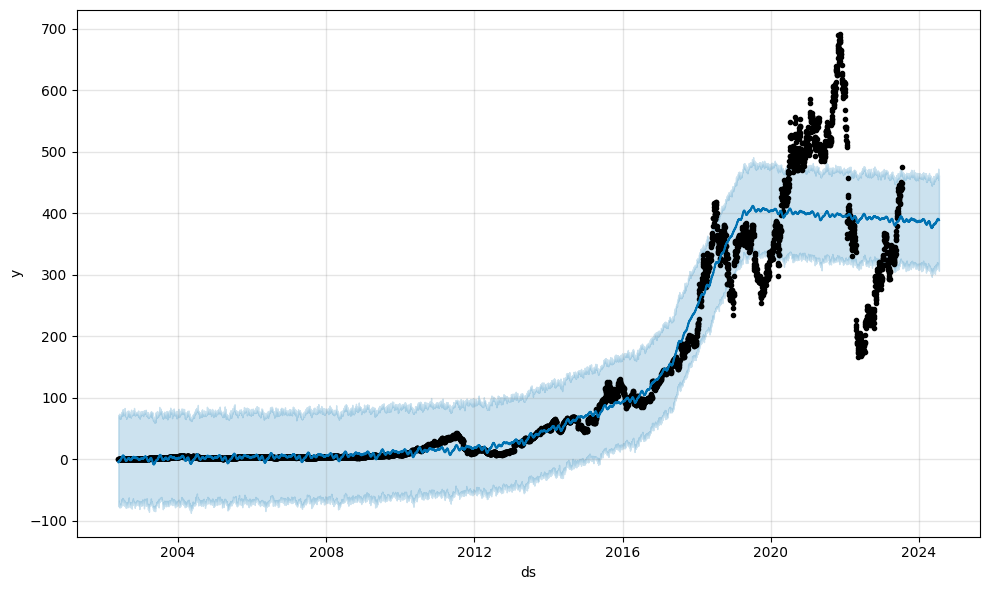

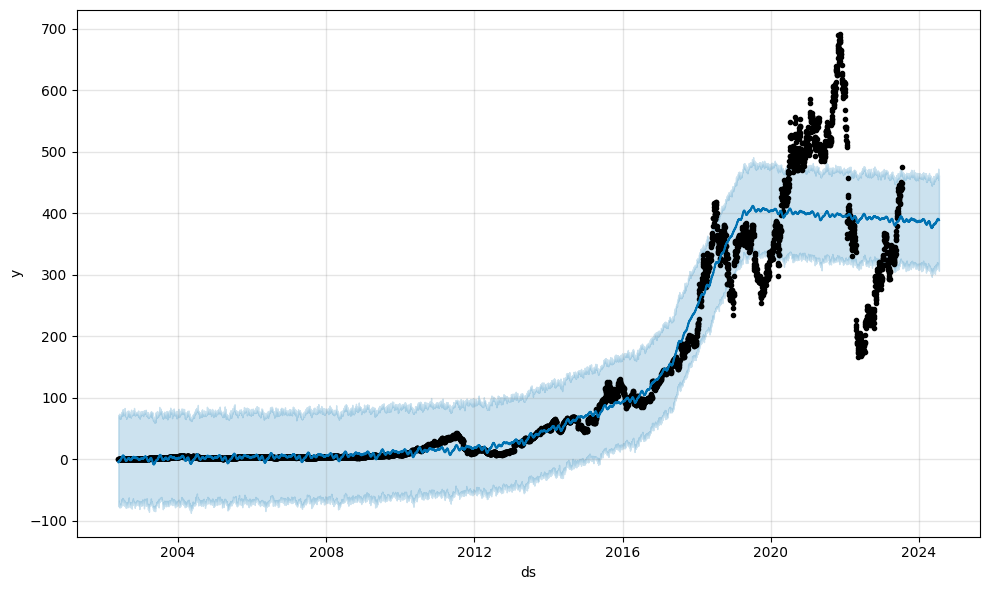

In [34]:
model.plot(forecast, xlabel='ds', ylabel='y')

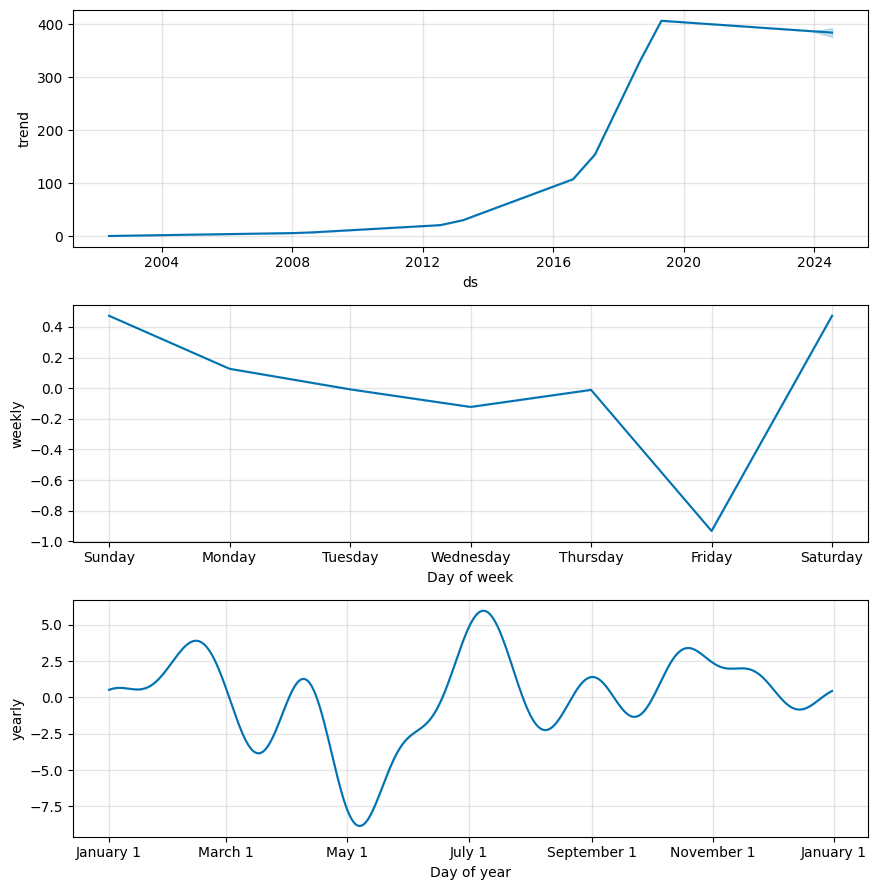

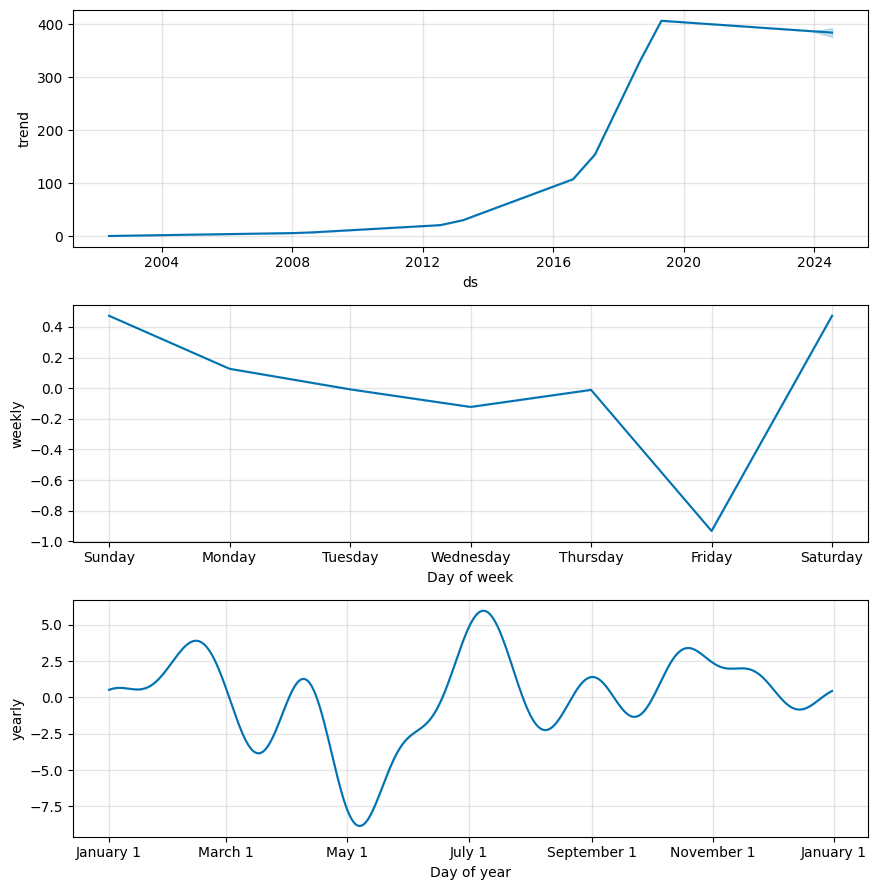

In [35]:
model.plot_components(forecast)

##Downloading the Forecast data

In [36]:
forecast.to_csv('nflx_forecast.csv')
files.download('nflx_forecast.csv')